In [1]:
NumeStudenti = "Cojocariu Oana si Fornade Teodora"
Specializare = "TST"
print("Proiect realizat de: ", NumeStudenti)
print(" \t Specializarea: ", Specializare)

Proiect realizat de:  Cojocariu Oana si Fornade Teodora
 	 Specializarea:  TST


In [2]:
import cv2
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import signal
from skimage.filters import sobel_h, sobel_v, scharr, gabor
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity



# Redimensionarea imaginii

In [3]:
#functie care redimensioneaza imaginea
def resize_image(image):
    new_width = 25
    new_height = 25
    new_dimensions = (new_width, new_height)

    resized_image = cv2.resize(image, new_dimensions)
    return resized_image

# Inserare imagine de test
Pentru a arata rezultatul operatorilor am ales o imagine de test.

In [4]:
image_for_test = cv2.imread('nisip.jpeg',0)


# Implementare functie de convolutie 

In [5]:
def convolution(image, kernel):
        height, width = image.shape
        #k_height, k_width = kernel.shape
        result = np.zeros((height, width), dtype=np.float32) #creeaza o matrice rezultat initiata cu 0
                                                           # cu tipul de date "unit8" pt a reprezenta intensitatile de pixel

#parcurgem pixelii si aplicam convolutia
        for i in range(1, height - 1): #parcurgere pixeli pe axa verticala
            for j in range(1, width - 1): #parcurgere pixeli pe axa orizontala
                roi = image[i-1:i+2, j-1:j+2] #se extrage o regiune de interes(ROI) din imaginea originala in jurul pixelului curent (ROI se suprapune peste kernel pt a efectua operatia de convolutie)
                result[i, j] = np.sum(roi * kernel) #suma este atribuita pixelului corespunzator din img rezultata

        return result

In [6]:
def convolution(image, kernel):
        height, width = image.shape
        result = np.zeros((height, width), dtype=np.float32) 

        for i in range(1, height - 1):
            for j in range(1, width - 1): 
                roi = image[i-1:i+2, j-1:j+2] 
                result[i, j] = np.sum(roi * kernel) 
        return result

### Functie pentru afisarea rezultatelor

In [7]:
def display_result(horizontal_edges, vertical_edges, x, y):
#magnitude
    edge_magnitude = np.sqrt(np.square(horizontal_edges) + np.square(vertical_edges))
    edge_magnitude_cv2 =  np.sqrt(np.square(x) + np.square(y))

#afisare rezultatele operatoului implementat printr-o functie proprie
    plt.figure(figsize=(16, 6))
    plt.subplot(2, 4, 1), plt.imshow(image_for_test, cmap='gray', vmin=0, vmax=255)
    plt.title('Imaginea originala'), plt.axis('off')

    plt.subplot(2, 4, 2), plt.imshow(horizontal_edges, cmap='gray', vmin=0, vmax=255)
    plt.title('Margini orizontale(impl proprie)'), plt.axis('off')

    plt.subplot(2, 4, 3), plt.imshow(vertical_edges, cmap='gray', vmin=0, vmax=255)
    plt.title('Margini verticale(impl proprie)'), plt.axis('off')

    plt.subplot(2, 4, 4), plt.imshow(edge_magnitude, cmap='gray', vmin=0, vmax=255)
    plt.title('Magnitudinea(impl proprie)'), plt.axis('off')

#afisare rezultatele operatoului implementat prin cv2
    plt.subplot(2, 4, 6), plt.imshow(x, cmap='gray', vmin=0, vmax=255), plt.axis('off')
    plt.title('Margini verticale(cv2)')
    plt.subplot(2, 4, 7), plt.imshow(y, cmap='gray', vmin=0, vmax=255), plt.axis('off')
    plt.title('Margini verticale(cv2)')
    plt.subplot(2, 4, 8), plt.imshow(edge_magnitude_cv2, cmap='gray', vmin=0, vmax=255), plt.axis('off')
    plt.title('Magnitudinea(cv2)')


#afisare histograme
    plt.figure(figsize=(10, 3))
    plt.subplot(1, 3, 1)
    plt.hist(image_for_test.ravel(), bins=256, range=(0, 255))
    plt.title('Histograma imaginii originale')
    plt.xlabel('Intensitatea pixelilor')
    plt.ylabel('Frecventa')

    plt.subplot(1, 3, 2)
    plt.hist(x.ravel(), bins=256, range=(0, 255))
    plt.title('Histograma marginilor orizontale')
    plt.xlabel('Intensitatea pixelilor')
    plt.ylabel('Frecventa')

    plt.subplot(1, 3, 3)
    plt.hist(y.ravel(), bins=256, range=(0, 255))
    plt.title('Histograma marginilor verticale')
    plt.xlabel('Intensitatea pixelilor')
    plt.ylabel('Frecventa')

    plt.tight_layout()
    plt.show()

# Implementare operator Prewitt fara functie predefinita

In [8]:
def prewitt_edge_detection(image):
    #definire masti
    kernel_horizontal = np.array([[1, 1, 1],
                                  [0, 0, 0],
                                  [-1, -1, -1]])

    kernel_vertical = np.array([[-1, 0, 1],
                                [-1, 0, 1],
                                [-1, 0, 1]])

    #aplicare convolutie
    prewitt_horizontal_manual = convolution(image, kernel_horizontal)
    prewitt_vertical_manual = convolution(image, kernel_vertical)

    return prewitt_horizontal_manual, prewitt_vertical_manual

# Rezultate operator Prewitt

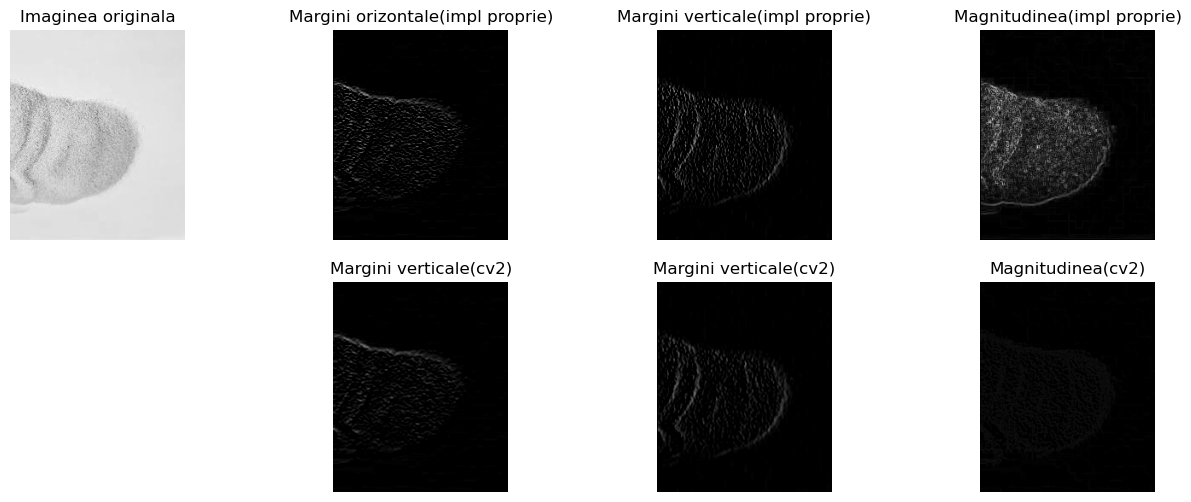

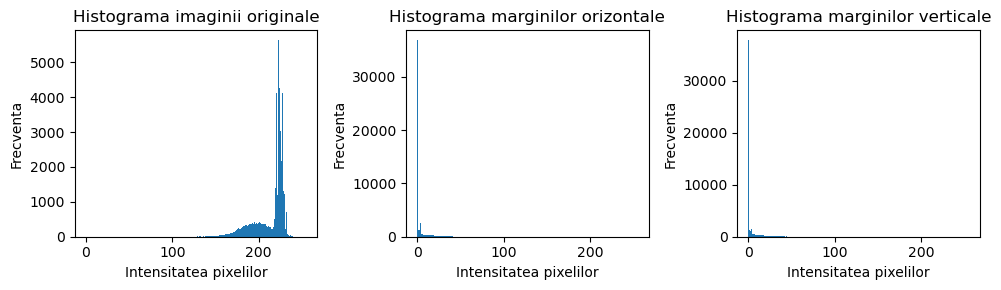

In [9]:
#definire masti pentru operatorul Prewitt:
kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
kernely = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

#aplicare estompare Gaussiana pentru reducerea zgomotului
blurred_image = cv2.GaussianBlur(image_for_test, (3, 3), 0)
prewittx = cv2.filter2D(blurred_image, -1, kernelx)
prewitty = cv2.filter2D(blurred_image, -1, kernely)

horizontal_edges_prewitt, vertical_edges_prewitt = prewitt_edge_detection(image_for_test)

display_result(horizontal_edges_prewitt, vertical_edges_prewitt, prewittx, prewitty)


# Implementare operator Sobel fara functie predefinita

In [10]:
def sobel_edge_detection(image):
    #mastile operatorului Sobel
    sobel_horizontal = np.array([[-1, -2, -1],
                                 [0, 0, 0],
                                 [1, 2, 1]])

    sobel_vertical = np.array([[-1, 0, 1],
                               [-2, 0, 2],
                               [-1, 0, 1]])

    #aplicarea convolutiei
    gradient_x = convolution(image.astype(np.float32), sobel_horizontal);
    gradient_y = convolution(image.astype(np.float32), sobel_vertical);

    return gradient_x, gradient_y

# Rezultate operator Sobel

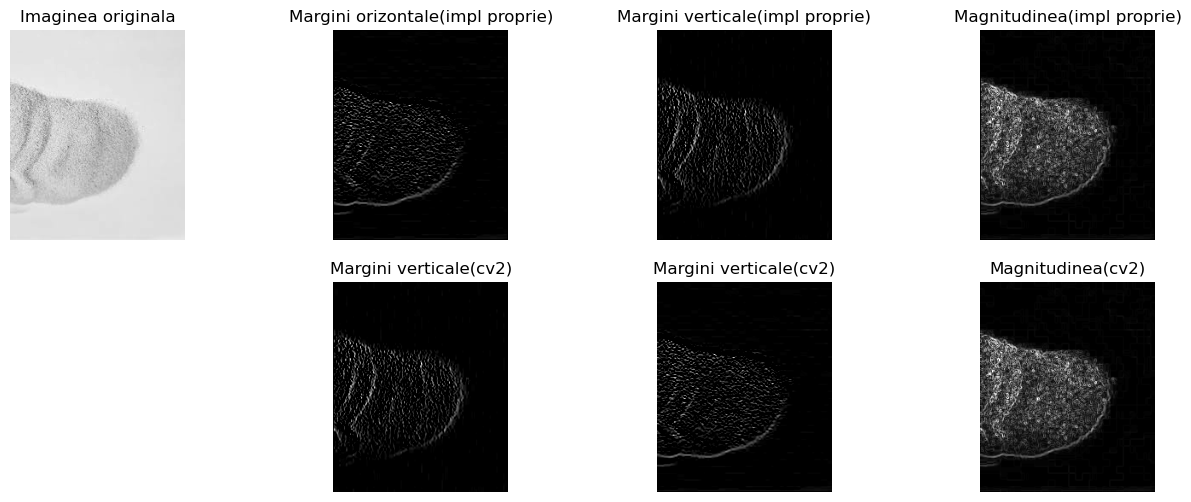

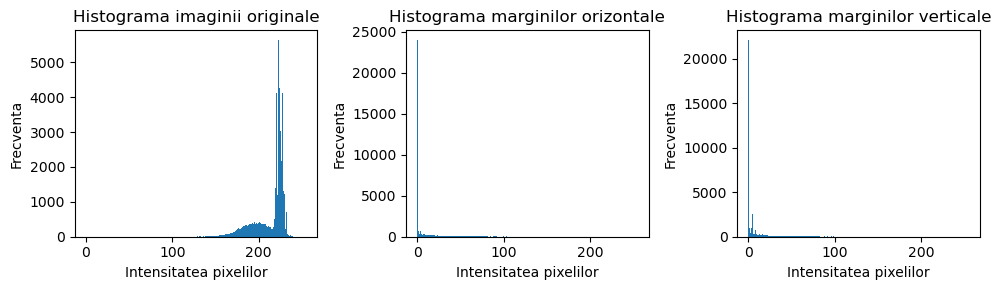

In [11]:
horizontal_edges_sobel, vertical_edges_sobel = sobel_edge_detection(image_for_test)
sobel_x = cv2.Sobel(image_for_test, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image_for_test, cv2.CV_64F, 0, 1, ksize=3)

display_result(horizontal_edges_sobel, vertical_edges_sobel, sobel_x, sobel_y)

# Implementarea operatorului Scharr

In [12]:
def scharr_edge_detection(image):
    # Operator Scharr pentru detectarea muchiilor orizontale
    scharr_horizontal = np.array([[3, 0, -3],
                                  [10, 0, -10],
                                  [3, 0, -3]])

    # Operator Scharr pentru detectarea muchiilor verticale
    scharr_vertical = np.array([[3, 10, 3],
                                [0, 0, 0],
                                [-3, -10, -3]])


    gradient_x = convolution(image.astype(np.float32), scharr_horizontal)
    gradient_y = convolution(image.astype(np.float32), scharr_vertical)

    return gradient_x, gradient_y

# Rezultate operator Scharr 

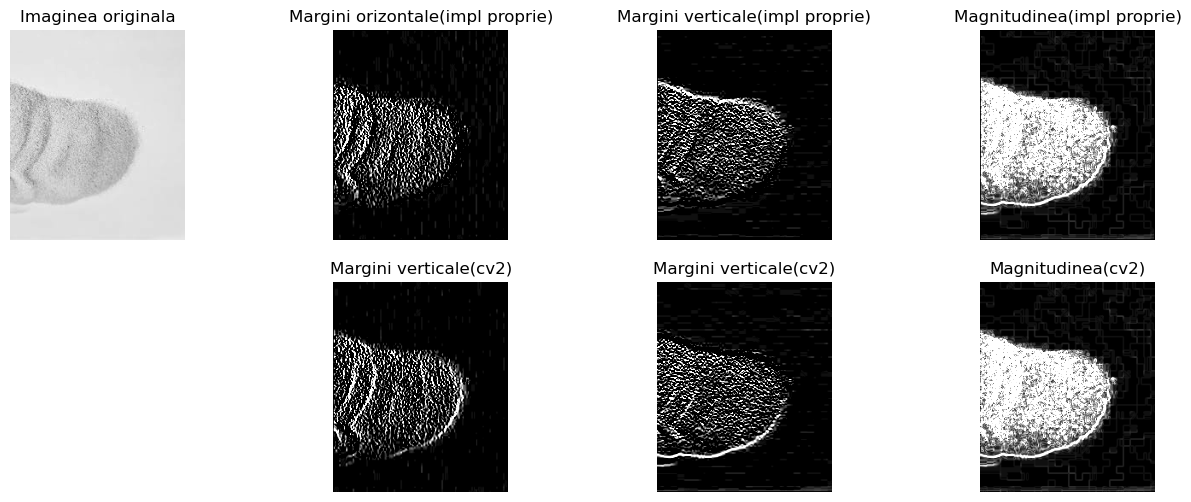

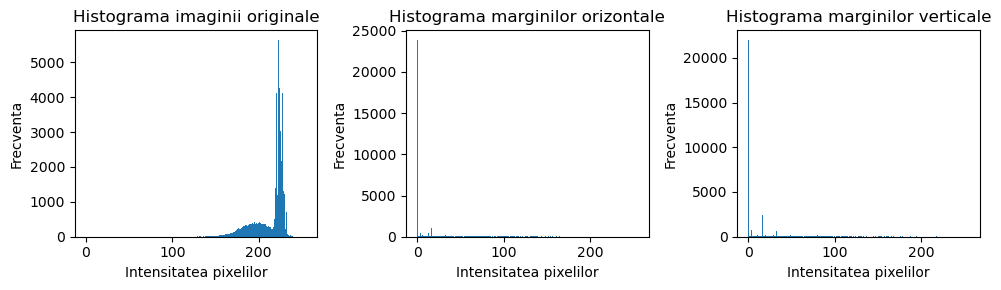

In [13]:
horizontal_edges_scharr, vertical_edges_scharr = scharr_edge_detection(image_for_test)
scharr_x = cv2.Scharr(image_for_test, cv2.CV_64F, 1, 0)
scharr_y = cv2.Scharr(image_for_test, cv2.CV_64F, 0, 1)

display_result(horizontal_edges_scharr, vertical_edges_scharr, scharr_x, scharr_y)

# Implementare filtru Gabor fara functie predefinita 

In [14]:
def gabor_filter_implementation(image):
    def gabor_kernel(size, sigma, theta, lambd, gamma):
        x, y = np.meshgrid(np.arange(-size//2 + 1, size//2 + 1),
                           np.arange(-size//2 + 1, size//2 + 1))
        x_theta = x * np.cos(theta) + y * np.sin(theta)
        y_theta = -x * np.sin(theta) + y * np.cos(theta)
        gabor = np.exp(-(x_theta**2 + (gamma**2)*y_theta**2) / (2 * sigma**2)) * np.cos(2 * np.pi * x_theta / lambd)
        return gabor

    def convolution(image, kernel):
        height, width = image.shape
        k_height, k_width = kernel.shape
        pad_height = k_height // 2
        pad_width = k_width // 2
        kernel = np.flipud(np.fliplr(kernel))
        image_padded = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
        result = np.zeros((height, width), dtype=np.uint8)
        for i in range(height):
            for j in range(width):
                roi = image_padded[i:i+k_height, j:j+k_width]
                result[i, j] = np.sum(roi * kernel)
        np.copyto(image, result)
        return image
    
    size = 15
    sigma = 2
    theta = 0
    lambd = 3.5
    gamma = 0.3

    gabor_kernel_example = gabor_kernel(size, sigma, theta, lambd, gamma)

    # Aplicare filtru Gabor
    gabor_result = convolution(image, gabor_kernel_example)
    
    # Aplică reducerea de zgomot pe rezultatul convoluției
    gabor_result_denoised = cv2.fastNlMeansDenoising(gabor_result, None, 10, 0)

    return gabor_result_denoised


# Rezultate filtru Gabor

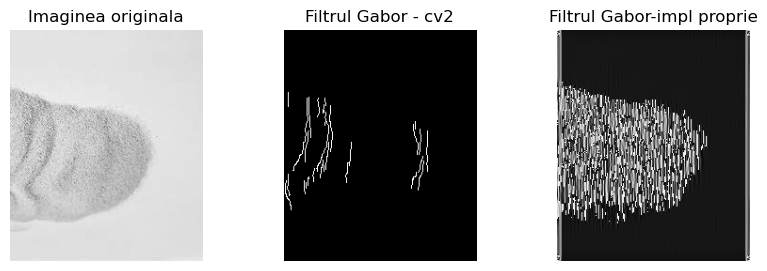

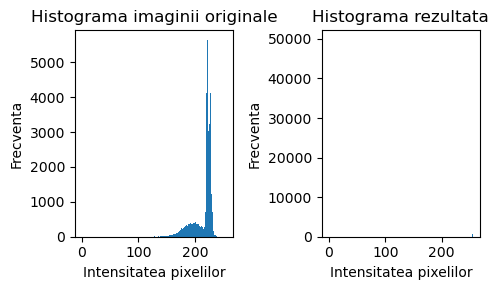

In [15]:
gabor_response_from_function = gabor_filter_implementation(image_for_test);

image_for_test = cv2.imread('nisip.jpeg',0)

size = 15
sigma = 1
theta = 0
lambd = 3.5
gamma = 0.3   
 
denoised_image = cv2.medianBlur(image_for_test, 5)
kernel = cv2.getGaborKernel((size, size), sigma, theta, lambd, gamma)
filtered_image = cv2.filter2D(denoised_image, cv2.CV_8UC3, kernel)
edges = cv2.Canny(filtered_image, 50, 150)
    
plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1), plt.imshow(image_for_test, cmap='gray', vmin=0, vmax=255)
plt.title('Imaginea originala'), plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(edges, cmap='gray', vmin=0, vmax=255)
plt.title('Filtrul Gabor - cv2'), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(gabor_response_from_function, cmap='gray', vmin=0, vmax=255)
plt.title('Filtrul Gabor-impl proprie'), plt.axis('off')

plt.figure(figsize=(5, 3))
plt.subplot(1, 2, 1)
plt.hist(image_for_test.ravel(), bins=256, range=(0, 255))
plt.title('Histograma imaginii originale')
plt.xlabel('Intensitatea pixelilor')
plt.ylabel('Frecventa')
plt.subplot(1, 2, 2)
plt.hist(edges.ravel(), bins=256, range=(0, 255))
plt.title('Histograma rezultata')
plt.xlabel('Intensitatea pixelilor')
plt.ylabel('Frecventa')

plt.tight_layout()
plt.show()

# Extragere trasaturi
Prewitt, Sobel , Scharr, filtru Gabor. Includerea acestora in vectorul de trasaturi

In [16]:
def extract_texture_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #gray = resize_image(gray) #redimensionare imagine
    
    #-----Prewitt---------------------
    # extragere Prewitt cu ajutorul functiei
    kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    prewittx = cv2.filter2D(image, -1, kernelx)
    kernely = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    prewitty = cv2.filter2D(image, -1, kernely)
    
    #Prewitt-implementare proprie
    horizontal_edges_prewitt, vertical_edges_prewitt = prewitt_edge_detection(gray);
    
    #-----Sobel---------------------
    #extragere Sobel cu ajutorul functiei din CV2
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    
    #Sobel-implementare proprie
    gradient_x_sobel, gradient_y_sobel = sobel_edge_detection(gray);
    
    #-----Scharr---------------------
    scharr_x = cv2.Scharr(gray, cv2.CV_64F, 1, 0)
    scharr_y = cv2.Scharr(gray, cv2.CV_64F, 0, 1)
    
    #Scharr-implementare proprie
    gradient_x_scharr, gradient_y_scharr = scharr_edge_detection(gray);
    
    
    #Combinam rezultatele intr-un vector de trasaturi
    feature_vector = np.hstack([prewittx.flatten(), prewitty.flatten(),
                                horizontal_edges_prewitt.flatten(), vertical_edges_prewitt.flatten(), 
                                sobel_x.flatten(), sobel_y.flatten(),
                                gradient_x_sobel.flatten(), gradient_y_sobel.flatten(),
                                scharr_x.flatten(), scharr_y.flatten(), 
                                gradient_x_scharr.flatten(), gradient_y_scharr.flatten() ])

    # implementare filtru Gabor
    size = 15      # Kernel size (odd for symmetry)
    sigma = 1    # Standard deviation of the Gabor kernel
    theta = 0      # Orientation of the Gabor kernel in radians
    lambd = 3.5   # Wavelength of the Gabor sinusoids
    gamma = 0.3    # Aspect ratio
 
    kernel = cv2.getGaborKernel((size, size), sigma, theta, lambd, gamma)
    filtered_image = cv2.filter2D(gray, cv2.CV_8UC3, kernel)
    edges = cv2.Canny(filtered_image, 50, 150)

    gabor_response_from_function = gabor_filter_implementation(gray);
    
    feature_vector = np.hstack([feature_vector, edges.flatten(), gabor_response_from_function.flatten()])

     # Impunerea unei lungimi fixe al vectorului de trasaturi
    fixed_length = 1000
    if len(feature_vector) < fixed_length:
        feature_vector = np.pad(feature_vector, (0, fixed_length - len(feature_vector)), 'constant')
    elif len(feature_vector) > fixed_length:
        feature_vector = feature_vector[:fixed_length]

    
    return feature_vector

# Incarcare date de test

In [17]:
def load_dataset_pixel_vectors(folder_path):
    class_vectors = {
        "boabe_de_fasole": [],
        "nisip": [],
        "pietris": [],
        "altele": []
    }

    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if img_path.endswith(".jpg") or img_path.endswith(".png") or img_path.endswith(".jpeg"):
            image = cv2.imread(img_path)
            image = resize_image(image)
            if image is not None:
                for i in range(image.shape[0]):
                    for j in range(image.shape[1]):
                        pixel = image[i, j]  
                        extracted_feature = extract_texture_features(image)

                        if extracted_feature is not None:
                            if "fasole" in filename:
                                class_vectors["boabe_de_fasole"].append(extracted_feature)
                            elif "nisip" in filename:
                                class_vectors["nisip"].append(extracted_feature)
                            elif "pietris" in filename:
                                class_vectors["pietris"].append(extracted_feature)
                            else:
                                class_vectors["altele"].append(extracted_feature)
                        else:
                            print(f"Eroare la extragerea trasaturii din pixelul ({i}, {j}) din imaginea {filename}")
            else:
                print(f"Eroare la incarcarea imaginii: {img_path}")

    # convertim lista sub forma de vector
    for key in class_vectors:
        class_vectors[key] = np.array(class_vectors[key])

    return class_vectors


In [18]:
dataset_pixel_labels_path = 'imagini_de_antrenare'

class_vectors = load_dataset_pixel_vectors(dataset_pixel_labels_path)

# Combining the class vectors and creating corresponding labels
X = np.vstack([class_vectors[label] for label in class_vectors if len(class_vectors[label]) > 0])
y = np.concatenate([[label] * len(class_vectors[label]) for label in class_vectors if len(class_vectors[label]) > 0])

#impartim lista in seturi de pregatire si testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#pentru clasificare utilizam SVM
svm_classifier = SVC(kernel='linear')

#antrenare SVM
svm_classifier.fit(X_train, y_train)

predictions = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [19]:
# dupa antrenarea modelului SVM
support_vectors = svm_classifier.support_vectors_ #contine vectorii suport obtinuti in timpul antrenarii SVM
dual_coefs = svm_classifier.dual_coef_ #extragem coeficientii duali
intercept = svm_classifier.intercept_

class_vectors = {} #initializeaza un dictionar gol pentru a adauga vectorii pentru fiecare clasa
classes = svm_classifier.classes_ #extrage etichetele corespunzatoare fiecarei clase

#vom itera prin fiecare clasa 
# - se vor extrage coeficientii duali si vectorul suport relevant clasei
# - normalizarea coeficientilor duali
# - calculam un vector reprezentativ pentru clasa combinand vectorul suport selectat cu coeficientii respectivi
# - stocam reprezentarea vectorului pentru fiecare clasa in variabila class_vectors
for idx, class_label in enumerate(classes):
    class_idx = np.where(y_train == class_label)[0]  
    if len(class_idx) > 0:
        class_idx = class_idx[0] 
        class_dual_coef = dual_coefs[:, class_idx].ravel()  # extragere coeficienti duali

        mask = (class_dual_coef != 0)
        non_zero_indices = np.nonzero(mask)[0]  

        class_support_vectors = support_vectors[non_zero_indices]
        class_dual_coef = class_dual_coef[non_zero_indices]
        class_dual_coef /= np.linalg.norm(class_dual_coef)  # normalizare

        class_representation = np.zeros_like(class_support_vectors[0])

        for coef, vector in zip(class_dual_coef, class_support_vectors):
            class_representation += coef * vector

        class_representation -= intercept[idx] / np.linalg.norm(class_representation)

        class_vectors[class_label] = class_representation


In [20]:
def extract_features_from_image(image_path):
    image = cv2.imread(image_path)
    if image is not None:
        pixel_features = extract_texture_features(image)  
        return pixel_features
    else:
        print("Eroare la incarcarea imaginii")
        return None

# Testare pe o alta imagine

In [21]:

new_image_path = 'nisip.jpeg'  
new_image_features = extract_features_from_image(new_image_path)

similarities = {}
for class_label, class_representation in class_vectors.items():
    similarity = cosine_similarity(new_image_features.reshape(1, -1), class_representation.reshape(1, -1))
    similarities[class_label] = similarity[0][0]
    
predicted_class = max(similarities, key=similarities.get)
 
if predicted_class == "boabe_de_fasole":
    print("In imagine sunt boabe de fasole.")
elif predicted_class == "pietris":
    print("In imagine este pietris.")
elif predicted_class == "nisip":
    print("In imagine este nisip")
else:
    print("Imagine nu corespunde caracteristicilor antrenate")
   

In imagine este nisip.


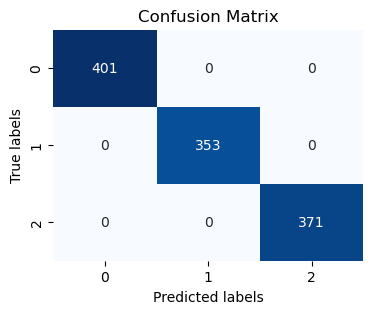

                 precision    recall  f1-score   support

boabe_de_fasole       1.00      1.00      1.00       401
          nisip       1.00      1.00      1.00       353
        pietris       1.00      1.00      1.00       371

       accuracy                           1.00      1125
      macro avg       1.00      1.00      1.00      1125
   weighted avg       1.00      1.00      1.00      1125



In [22]:
# Generarea matricii de confuzie
conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# raportul de clasificare
print(classification_report(y_test, predictions, zero_division=1))

#precision =  abilitatea modelului de a identifica toate instantele relevante din setul de date
           # = masura a falselor clasificari
#recall = masura a non-detectiilor = abilitatea clasificatorului de a identifica doar cazurile relevante din setul de date
#f1-score = masura care combina precision si recall intr-un mod unitar
